In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load Image
img = cv2.imread('/content/lane.jpg')

In [3]:
# Create a copy image
img_copy = img.copy()
# Convert to Gray
gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
# Noise Filter
gauss_gray = cv2.GaussianBlur(gray, (5,5), 0)
# Canny Filter
canny = cv2.Canny(gauss_gray, 60, 150)


In [15]:
def crop_roi(image):
    polygons = np.array([[(200, 704), (1100, 704), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [16]:
# Find coordinate from slope, intercept
def find_coordinate(img, line_param):
    slope, intercept = line_param
    y1 = img.shape[0]
    y2 = int(y1*(2.5/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [x1,y1,x2,y2]

In [17]:

# Find a line from similar lines
def merge_lines(img, lines):
    left_lines = []
    right_lines = []

    for line in lines:
        x1, y1, x2, y2 = line[0]
        params = np.polyfit((x1,x2), (y1,y2), 1)
        slope = params[0]
        intercept = params[1]

        if slope<0:
            left_lines.append((slope,intercept))
        else:
            right_lines.append((slope,intercept))
    left_line_average = np.average(left_lines, axis=0)
    right_line_average = np.average(right_lines, axis=0)

    coordinate_left_line = find_coordinate(img, left_line_average)
    coordinate_right_line = find_coordinate(img, right_line_average)

    return [coordinate_left_line, coordinate_right_line]

In [18]:
# Display line
def display_line(img, lines):
    line_image = np.zeros_like(img)
    for x1, y1, x2, y2 in lines:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 7)
        print(x1, y1, x2, y2)

In [19]:
# Crop Img
crop_img = crop_roi(canny)
# Hough Transform #(33,1,4)
mask = np.zeros_like(img)
lines = cv2.HoughLinesP(crop_img, 2, np.pi/180, 100, minLineLength=40, maxLineGap=5)
# Display line
# mask = np.zeros_like(img)
try:
    some_lines = merge_lines(img, lines)
except:
    pass

display_line(img, some_lines)

307 704 528 352
983 704 634 352


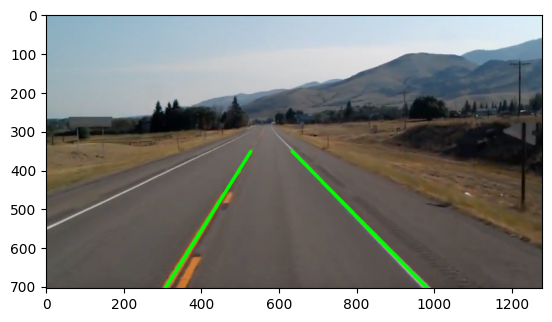

In [22]:
# Show image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
